# Fit QSO Spectrum (Linear Wavelength + km/s widths)

This example demonstrates running the line fitting on a linear wavelength axis while specifying line-profile parameters in km/s. It assumes the parameter table CSV/YAML has been converted to km/s (see the earlier CSV/YAML editing notebook).

In [1]:
# Configure linear axis and km/s velocities BEFORE importing qsofitmore
import os
os.environ['QSOFITMORE_WAVE_SCALE'] = 'linear'
os.environ['QSOFITMORE_VELOCITY_UNITS'] = 'km/s'
os.environ['QSOFITMORE_NARROW_MAX_KMS'] = '1200'  # cap for narrow lines

# Imports
from qsofitmore import QSOFitNew
from qsofitmore.config import migration_config

from qsofitmore.line_params_io import csv_to_fits
from astropy.table import Table
import pandas as pd

path = './output/'
parlist_basename = 'qsopar_linear'
csv_path = os.path.join(path, f'{parlist_basename}.csv')
fits_path = os.path.join(path, f'{parlist_basename}.fits')
migration_config.use_lmfit_lines=True

# Ensure FITS parameters reflect the CSV values (km/s units).
# Header will record velocity units if env is set to km/s.
if os.path.exists(csv_path):
    csv_to_fits(csv_path, fits_path)
else:
    print('Expected parameter CSV not found:', csv_path)
    print('Convert qsopar_log.csv → qsopar_linear.csv via convert_csv_lnlambda_to_kms before running.')

## Load spectrum and run fitting

This mirrors the standard example, but uses linear-axis fitting and km/s widths based on the environment above.

/var/folders/83/v8zdmt25491_9m39df4cg4sr0000gn/T/ipykernel_48313/2042635227.py:8: DeprecationWarning: 'reject_badpix' is deprecated; rely on SDSS masks or 'wave_mask' for pixel rejection.
  q.Fit(name = None,


`mapname` for extinction not set.
Setting `mapname` to `sfd`.
Get negtive host galaxy flux larger than 100 pixels, decomposition is not applied!
['NeV3426', 'OII3728', 'Hg_na', 'Hb_na', 'OIII4959', 'OIII5007', 'OIII4959w', 'OIII5007w', 'Ha_na', 'NII6549', 'NII6585', 'SII6718', 'SII6732']


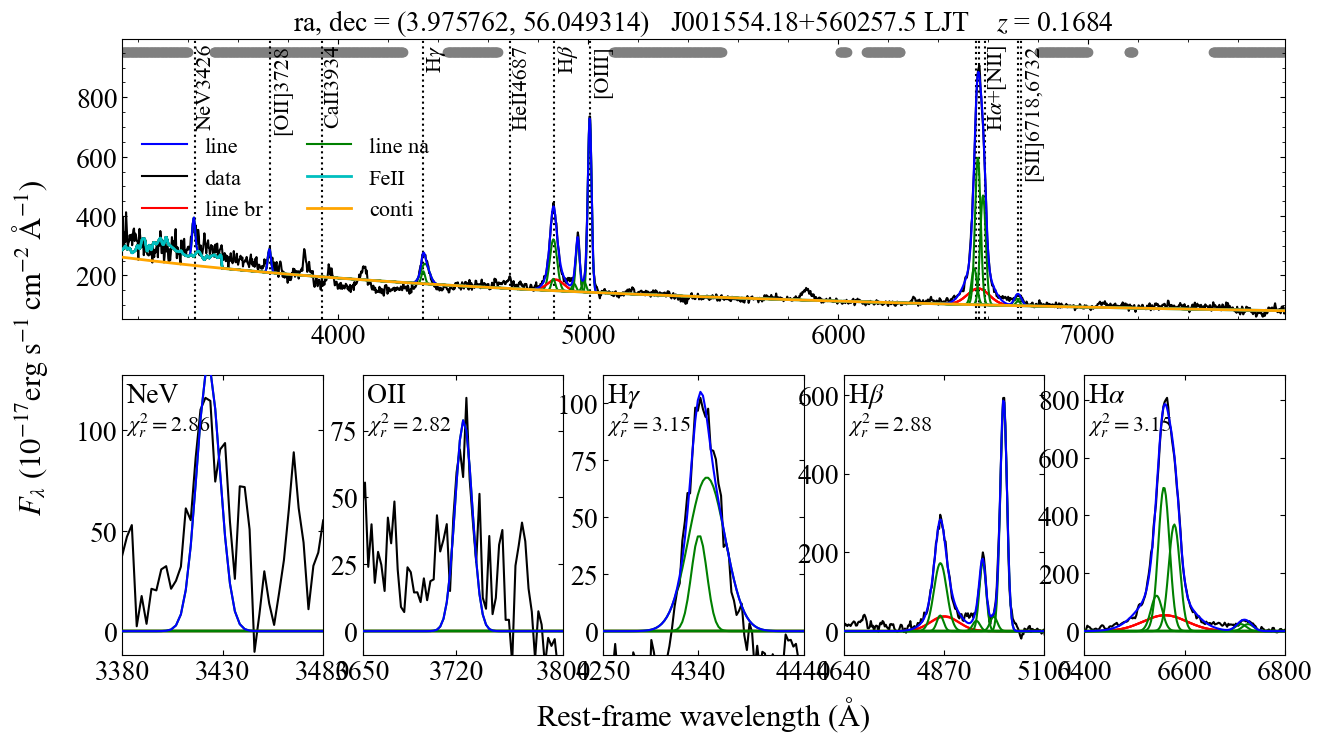

In [2]:
# a) From numpy-array-like data (CSV)
df = pd.read_csv('./data/spec_J001554.18+560257.5_LJT.csv')
q = QSOFitNew(lam=df.lam, flux=df.flux*1e17, err=df.err*1e17,
              z=0.1684, ra=3.97576206, dec=56.04931383,
              name='J001554.18+560257.5_LJT', is_sdss=False, path=path)

# Run fitting using the linear axis and km/s widths
q.Fit(name = None,
      deredden          = True,
      wave_range        = None,
      wave_mask         = None,
      decomposition_host= True,
      Mi                = None,
      npca_gal          = 5,
      npca_qso          = 20,
      include_iron      = True,                   # enable FeII fitting
      iron_temp_name    = "BG92-VW01",            # options: "BG92-VW01", "V09", "G12"
      poly              = False,
      BC                = False,
      MC                = False,
      n_trails          = 20,
      linefit           = True,
    #   tie_lambda        = True,
    #   tie_width         = True,
    #   tie_flux_1        = True,
    #   tie_flux_2        = True,
      save_result       = True,
      plot_fig          = True,
      save_fig          = True,
      plot_line_name    = True,
      plot_legend       = True,
      save_fits_name    = None)

/var/folders/83/v8zdmt25491_9m39df4cg4sr0000gn/T/ipykernel_48313/1056316545.py:4: DeprecationWarning: 'reject_badpix' is deprecated; rely on SDSS masks or 'wave_mask' for pixel rejection.
  q.Fit(name              = 'J001554.18+560257.5_LJT_ADV_LINEAR_KMS',


The dust map is planck.
Get negtive host galaxy flux larger than 100 pixels, decomposition is not applied!
N_e for Balmer line series not set.
Setting N_e = 1E09. (q.set_log10_electron_density(9))
['w4434_w4684']
['NeV3426', 'OII3728', 'Hg_na', 'Hb_na', 'OIII4959', 'OIII5007', 'OIII4959w', 'OIII5007w', 'Ha_na', 'NII6549', 'NII6585', 'SII6718', 'SII6732']


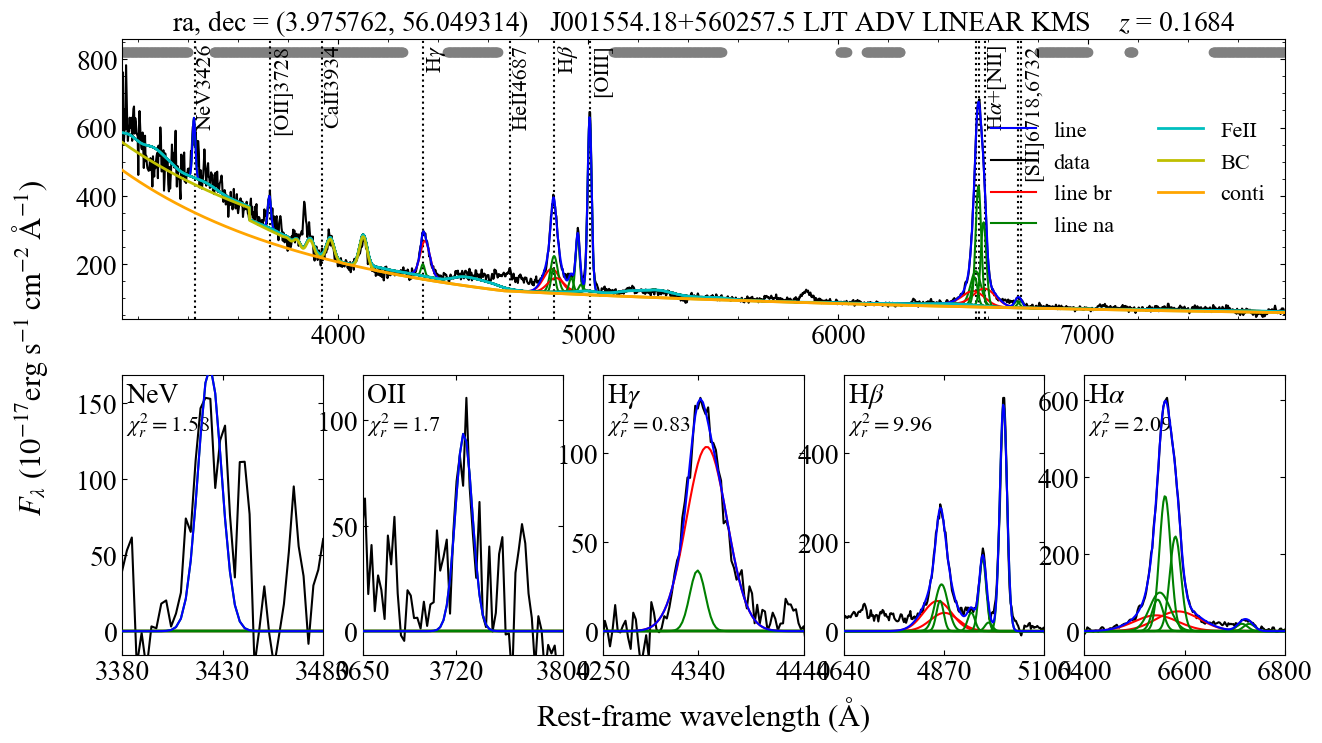

In [4]:
q = QSOFitNew.fromiraf("/Users/yuming/tools/qsofitmore/qsofitmore/examples/data/spec_J001554.18+560257.5_LJT.fits",
                       redshift=0.1684,telescope='LJT',path=path)
q.setmapname("planck")
q.Fit(name              = 'J001554.18+560257.5_LJT_ADV_LINEAR_KMS',
      nsmooth           = 1,
      deredden          = True,
      # wave_range        = [3200, 7200],
      wave_mask         = None,
      Fe_flux_range     = [4434, 4684] , # Wavelength range of FeII flux saved to the output file
      decomposition_host= True,
      # Mi                = -23,
      # npca_gal          = 5,
      # npca_qso          = 20,
      include_iron      = True,          # enable FeII fitting
      iron_temp_name    = "V09",         # options: "BG92-VW01", "V09", "G12"
      poly              = False,
      broken_pl         = True,          # enable broken power-law
      BC                = True,          # enable Balmer continuum and high-order Balmer lines
      MC                = False,         # optional: enable Monte Carlo error estimation
      n_trails          = 20,
      linefit           = True,
      tie_lambda        = True,
      tie_width         = True,
      tie_flux_1        = True,
      tie_flux_2        = True,
      save_result       = True,
      plot_fig          = True,
      save_fig          = True,
      plot_line_name    = True,
      plot_legend       = True,
      save_fits_name    = None)